<a href="https://colab.research.google.com/github/amalvarezme/AnaliticaDatos/blob/master/Jenni_Wine_GCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score, roc_auc_score, mutual_info_score, normalized_mutual_info_score, adjusted_mutual_info_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import mode
import numpy as np

def ook(t):
  #creamos la instancia lb
  lb = LabelBinarizer()  # Este convierte las etiquetas categóricas en representaciones binarias
  y_ook = lb.fit_transform(t) # Acá, fit_transform ajusta el label binarizer a mis datos de entrada

  # En resumen, el LabelBinarizer "aprende" de los datos de entrada cómo debe realizar la conversión de etiquetas categóricas a binarias, jiji
  # Luego, el método fit_transform se encarga de aplicar esa transformación a los datos de entrada t

  if len(np.unique(t))==2:
    y_ook = np.concatenate((1-y_ook.astype(bool), y_ook), axis = 1)

  return y_ook



def evaluation_metrics(y_true, y_pred, print_result=True):
    acc = 0
    auc = 0
    auc_sk = 0
    #mi = 0
    nmi = 0
    #ami = 0
    bacc = 0

    # Accuracy
    #report = classification_report(y_pred.argmax(axis=1), y_true.ravel(), output_dict=True)
    acc = accuracy_score( y_true.ravel(), y_pred.argmax(axis=1))  #report['accuracy']

    # Balanced accuracy
    bacc = balanced_accuracy_score(y_true.squeeze(), y_pred.argmax(axis=1).squeeze(), adjusted=True)

   # # Mutual Information
   # mi = mutual_info_score(y_true.squeeze(), y_pred.argmax(axis=1).squeeze())

    # Normalized Mutual Information
    nmi = normalized_mutual_info_score(y_true.squeeze(), y_pred.argmax(axis=1).squeeze())

    # Adjusted Mutual Information
    #ami = adjusted_mutual_info_score(y_true.squeeze(), y_pred.argmax(axis=1).squeeze())

    # AUC (Tensorflow)
    auc_metric = tf.keras.metrics.AUC(from_logits=True)
    auc_metric.update_state(y_true, y_pred.argmax(axis=1).astype('float'))
    auc = auc_metric.result().numpy()
    auc_metric.reset_states()

    # AUC (scikit-learn)
    auc_sk = roc_auc_score(ook(y_true), y_pred)

    if print_result:
        print("Accuracy: {:.4f}".format(acc))
        print("Balanced Accuracy: {:.4f}".format(bacc))
        print("Mutual Information: {:.4f}".format(mi))
        print("Normalized Mutual Information: {:.4f}".format(nmi))
        print("Adjusted Mutual Information: {:.4f}".format(ami))
        print("AUC (Tensorflow): {:.4f}".format(auc))
        print("AUC (scikit-learn): {:.4f}".format(auc_sk))

    return acc, auc, auc_sk, nmi, bacc   # mi, , ami

In [ ]:
#creamos la instancia lb
lb = LabelBinarizer()  # Este convierte las etiquetas categóricas en representaciones binarias
y_ook = lb.fit_transform([1, 2, 1, 1, 2]) # Acá, fit_transform ajusta el label binarizer a mis datos de entrada
print(y_ook)
# En resumen, el LabelBinarizer "aprende" de los datos de entrada cómo debe realizar la conversión de etiquetas categóricas a binarias, jiji
# Luego, el método fit_transform se encarga de aplicar esa transformación a los datos de entrada t

if len(np.unique([1, 3, 1, 1, 3]))==2:
  y_ook = np.concatenate((1-y_ook.astype(bool), y_ook), axis = 1)

  print(y_ook)

[[0]
 [1]
 [0]
 [0]
 [1]]
[[1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]]


# Subclassing for RCDNN

In [ ]:
!git clone https://github.com/Jectrianama/GCCE_TEST.git

Cloning into 'GCCE_TEST'...
remote: Enumerating objects: 1157, done.
remote: Counting objects: 100% (346/346), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 1157 (delta 249), reused 293 (delta 218), pack-reused 811
Receiving objects: 100% (1157/1157), 50.16 MiB | 35.37 MiB/s, done.
Resolving deltas: 100% (564/564), done.


In [ ]:
# -*- coding: utf-8 -*-
"""labels_generation

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/14Vn5eMujyFsoOiy3aXsDyLv8zLsHb5_H
"""

import random
import warnings
import numpy as np
#import climin
from functools import partial
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Defining the Sigmoid function and Softmax function


def Sigmoid(f_r):
    lam_r = 1 / (1 + np.exp(-f_r))
    return lam_r

# Asigna por medio de votación cuál es la clase que
# Cuando no tengo ground truth, defino dicha etiqueta real por votación (mayoría)

def MAjVot(Y, K):
    N, R = Y.shape
    Yhat = np.zeros((N, 1))
    for n in range(N):
        votes = np.zeros((K, 1))
        for r in range(R):
            for k in range(K):
                if Y[n, r] == k + 1:
                    votes[k] = votes[k] + 1
        Yhat[n] = np.argmax(votes) + 1
    return Yhat

# Hay varios métodos para cuando solo tengo una etiqueta real
# Método de generación sintética de anotadores
# Acá, es pequeña la bd entonces etonces tenemos un ground truth y deseamos generar R anotadores de forma sintética

# El de Julián

# Los parámetros son la entrada,  s decir, tiene en cuenta el tamaño de este espacio de entrada para saber cómo asignar a cada anotador su versión de ground truth
# et, real, datos r anotadores y el NrP, jeje

def MA_Clas_Gen(Xtrain, ytrain, R, NrP):

    N = len(ytrain)
    K = len(np.unique(ytrain)) # cantidad de clases que tenemos
    Kn = np.unique(ytrain) # me dice cuántos datos hay (valores)
    aux = 0
    A = np.zeros((K, 1)) # vector
    for k in Kn:
        A[aux] = (ytrain == k).sum() # sumo los que son iguales en cada clase
        aux = aux + 1
    per = np.min(A) # acá miro el que menos elementos tiene
    if N < 25000:  #si tengo menos de 25000 muestras puedo hacer una reducción de dimensión no lineal usando los datos de entrada (acá es donde depende delesp de entrada)
                    # Porque el TSNE es eficiente con menos de 25000 muestras
        Xtrain = TSNE(n_components=1, perplexity=per / 2).fit_transform(Xtrain)
                    # en caso de que no, empiezo a sumar las muestras
    else:
        Xtrain = np.sum(Xtrain, 1)

    Xtrain = Xtrain - Xtrain.min() #centralización
    #print(Xtrain.min(), Xtrain.max())
    Xtrain = Xtrain / Xtrain.max() #normalización
    Xtrain = Xtrain.reshape((N, 1)) # n filas y una columna
    yprueba = np.ones((N, 1))

    # ACÁ TOdo de pone potnente (yisuscraist aiuda)
    # Esto es una forma de generarla a partir de senos y cosenos
    #u sub q que se operan con unos pesos
    u_q = np.empty((Xtrain.shape[0], 3))
    u_q[:, 0, None] = 4.5 * np.cos(2 * np.pi * Xtrain + 1.5 * np.pi) - \
        3 * np.sin(4.3 * np.pi * Xtrain + 0.3 * np.pi)

    u_q[:, 1, None] = 4.5 * np.cos(1.5 * np.pi * Xtrain + 0.5 * np.pi) + \
        5 * np.sin(3 * np.pi * Xtrain + 1.5 * np.pi)

    u_q[:, 2, None] = 1

    W = []
    # q=1
    Wq1 = np.array(([[0.4], [0.7], [-0.5], [0], [-0.7]]))  # hiperparámetros definidos por Julián
    W.append(Wq1)
    # q=2
    Wq2 = np.array(([[0.4], [-1.0], [-0.1], [-0.8], [1.0]]))
    W.append(Wq2)
    Wq3 = np.array(([[3.1], [-1.8], [-0.6], [-1.2], [1.0]]))
    W.append(Wq3)

    # los parámetros anteriores son los que definen la performance de los anotadores

    # los senos y cosenos suavizan los anotadores

    F_r = []
    Lam_r = []
    for r in range(R):
        f_r = np.zeros((Xtrain.shape[0], 1))
        # rho_r = np.zeros((Xtrain.shape[0], 1))
        for q in range(3):
            f_r += W[q][r].T * u_q[:, q, None]
        F_r.append(f_r)
        lam_r = Sigmoid(f_r)
        lam_r[lam_r > 0.5] = 1
        lam_r[lam_r <= 0.5] = 0
        Lam_r.append(lam_r)
    plt.plot(Xtrain, Lam_r[2], 'rx')
    plt.show()
    seed = 0
    np.random.seed(seed)
    Ytrain = np.ones((N, R))
    for r in range(R):
        aux = ytrain.copy()
        for n in range(N):
            if Lam_r[r][n] == 0:
                labels = np.arange(1, K + 1)
                a = np.where(labels == ytrain[n])
                labels = np.delete(labels, a)
                idxlabels = np.random.permutation(K - 1)
                aux[n] = labels[idxlabels[0]]
        Ytrain[:, r] = aux.flatten()

    # Ytrain = (Ytrain*maxy) + miny

    iAnn = np.zeros((N, R), dtype=int)  # this indicates if the annotator r labels the nth sample.
    Nr = np.ones((R), dtype=int) * int(np.floor(N * NrP))
    for r in range(R):
        if r < R - 1:
            indexR = np.random.permutation(range(N))[:Nr[r]]
            iAnn[indexR, r] = 1
        else:
            iSimm = np.sum(iAnn, axis=1)
            idxZero = np.asarray([i for (i, val) in enumerate(iSimm) if val == 0])
            Nzeros = idxZero.shape[0]
            idx2Choose = np.arange(N)
            if Nzeros == 0:
                indexR = np.random.permutation(range(N))[:Nr[r]]
                iAnn[indexR, r] = 1
            else:
                idx2Choose = np.delete(idx2Choose, idxZero)
                N2chose = idx2Choose.shape[0]
                idxNoZero = np.random.permutation(N2chose)[:(Nr[r] - Nzeros)]
                idxTot = np.concatenate((idxZero, idx2Choose[idxNoZero]))
                iAnn[idxTot, r] = 1

    # Now, we verify that all the samples were labeled at least once
    Nr = (np.sum(iAnn, 0))
    iSimm = np.sum(iAnn, axis=1)
    if np.asarray([i for (i, val) in enumerate(iSimm) if val == 0]).sum() == 0:
        ValueError("all the samples must be labeled at least once")

    # Finally, if iAnn=0 we assign a reference value to indicate a missing value
    Vref = -1e-20
    for r in range(R):
        Ytrain[iAnn[:, r] == 0, r] = Vref

    return Ytrain, iAnn, Lam_r


def CrossVal(X, pp, Nk):
    N = X.shape[0]
    Ntr = int(N * pp)
    Nte = N - Ntr
    idxtr = np.zeros((Ntr, Nk))
    idxte = np.zeros((Nte, Nk))

    for i in range(Nk):
        index = np.random.permutation(range(N))
        idxtr[:, i] = index[:Ntr]
        idxte[:, i] = index[Ntr:]

    return idxtr, idxte


el generalized crosss entropy

In [ ]:
# import os
# os.chdir('/content/GCCE_TEST/gcecdl/labels_generation.py')
# #from  keras_ma_gcce import *
# from labels_generation import MA_Clas_Gen

# os.chdir('../../')

In [ ]:
#cargar datos desde drive otros dataset
FILEID = "1AU8pTtCLihBjCZjWITaAzpnEuL4RO436"
#https://drive.google.com/file/d/1AU8pTtCLihBjCZjWITaAzpnEuL4RO436/view?usp=sharing
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O  DataGCCE.zip && rm -rf /tmp/cookies.txt
!unzip -o DataGCCE.zip
!dir

--2023-10-27 17:06:19--  https://docs.google.com/uc?export=download&confirm=&id=1AU8pTtCLihBjCZjWITaAzpnEuL4RO436
Resolving docs.google.com (docs.google.com)... 142.251.172.101, 142.251.172.100, 142.251.172.138, ...
Connecting to docs.google.com (docs.google.com)|142.251.172.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/44r247tumh4ggncag3cf098p13bsaf9p/1698426375000/07591141114418430227/*/1AU8pTtCLihBjCZjWITaAzpnEuL4RO436?e=download&uuid=792afb26-4f28-4df1-81aa-f562a0059a05 [following]
--2023-10-27 17:06:19--  https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/44r247tumh4ggncag3cf098p13bsaf9p/1698426375000/07591141114418430227/*/1AU8pTtCLihBjCZjWITaAzpnEuL4RO436?e=download&uuid=792afb26-4f28-4df1-81aa-f562a0059a05
Resolving doc-00-90-docs.googleusercontent.com (doc-00-90-docs.googleusercontent.com)... 173.194.195.1

In [ ]:
#cargar datos desde drive acceso libre
FILEID = "1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW"
#https://drive.google.com/file/d/1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW/view?usp=sharing
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O MADatasets.zip && rm -rf /tmp/cookies.txt
!unzip -o MADatasets.zip
!dir

--2023-10-27 17:06:20--  https://docs.google.com/uc?export=download&confirm=t&id=1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW
Resolving docs.google.com (docs.google.com)... 142.251.172.101, 142.251.172.100, 142.251.172.138, ...
Connecting to docs.google.com (docs.google.com)|142.251.172.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c0d634p7a2h30cls3rb3fifb2geeumgk/1698426375000/07591141114418430227/*/1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW?e=download&uuid=3d4c0fb5-2abe-49e3-9c3a-9b6ae6a32eba [following]
--2023-10-27 17:06:20--  https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c0d634p7a2h30cls3rb3fifb2geeumgk/1698426375000/07591141114418430227/*/1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW?e=download&uuid=3d4c0fb5-2abe-49e3-9c3a-9b6ae6a32eba
Resolving doc-00-90-docs.googleusercontent.com (doc-00-90-docs.googleusercontent.com)... 173.194.195.

Prueba JUlián CKS

In [ ]:
# -*- coding: utf-8 -*-
"""Keras_CKA.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1IjISolh0J4scGwmy0l8sWIQAaqZkc-eR
"""
import tensorflow as tf
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow_probability as tfp
from sklearn.base import  BaseEstimator, TransformerMixin
import numpy as np


class CKA(BaseEstimator, TransformerMixin):
    def __init__(self,epochs=50,batch_size=100,length_scale=1e-2,iAnn=np.ones(2)):
        self.epochs = epochs
        self.batch_size = batch_size
        self.length_scale=length_scale
        self.iAnn = iAnn
        self.R = self.iAnn.shape[1] #annotators
        self.mu = tf.Variable(tf.random.uniform(shape=(1, self.R), dtype=tf.float64))
        self.ls = tf.Variable(self.length_scale, dtype=tf.float64)

    # function to compute an exponetial quadratic kernel over the input features
    def ComputeKernel_X(self,X):
        kernel = tfp.math.psd_kernels.ExponentiatedQuadratic(length_scale=self.ls,
                                                  name='ExponentiatedQuadratic')
        return kernel.matrix(X,X)

    # function to compute a linear kernel over the labels.
    def ComputeKernel_Y(self,Y,iAnn):
        kernel = tfp.math.psd_kernels.Linear(bias_variance=None,
                                             slope_variance=None, shift=None,
                                             feature_ndims=1,validate_args=False,
                                             name='Linear')
        N, R = Y.shape
        Y = tf.multiply(Y,iAnn)
        K_mu = tf.zeros([N,N], dtype=tf.dtypes.float64)
        for r in range(R):
            K_mu = tf.math.add(K_mu,self.mu[0,r]*kernel.matrix(Y[:,r:r+1],Y[:,r:r+1]))
        return K_mu

    # we define the loss fuction based on the centered kernel alignment framework
    def CKA_loss(self,X,Y,iAnn):
        N = X.shape[0]
        KXX = self.ComputeKernel_X(X)
        Kmu = self.ComputeKernel_Y(Y,iAnn)
        I = tf.eye(N, dtype=tf.dtypes.float64)
        ones = tf.ones([N,1], dtype=tf.dtypes.float64)
        H = I - tf.linalg.matmul(ones, ones, transpose_b=True)/N
        KXX_c = tf.linalg.matmul(H,tf.linalg.matmul(KXX,H))
        Kmu_c = tf.linalg.matmul(H,tf.linalg.matmul(Kmu,H))
        num = tf.linalg.trace(tf.matmul(Kmu_c,KXX_c,transpose_a=True))
        den1 = tf.sqrt(tf.linalg.trace(tf.matmul(Kmu_c,Kmu_c,transpose_a=True)))
        den2 = tf.sqrt(tf.linalg.trace(tf.matmul(KXX_c,KXX_c,transpose_a=True)))


        return -num/(den1*den2)

    def fit(self,X,Y):
        batch_size = self.batch_size
        train_data=tf.data.Dataset.from_tensor_slices((X,Y,self.iAnn))
        train_data=train_data.shuffle(buffer_size=100).batch(batch_size).repeat(5)
        optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
        for epoch in range(self.epochs):
            print("Start of epoch %d" % (epoch,))

            # Iterate over the batches of the dataset.
            for step, (x_batch_train,y_batch_train,iAnn_batch) in enumerate(train_data):
                with tf.GradientTape() as tape:
                    loss =  self.CKA_loss(x_batch_train, y_batch_train,iAnn_batch)
                grads = tape.gradient(loss, [self.mu, self.ls])
                optimizer.apply_gradients(zip(grads, [self.mu, self.ls]))

                if step % 50 == 0:
                    print("step %d: mean loss = %.4f" % (step, loss))

    def transform(self, X, *_):
        mu = self.mu.numpy()[0]
        mu[mu<0] = 0
        mu = mu/np.sum(mu)

        return mu

    def fit_transform(self,X,y):
        self.fit(X,y)
        return  self.transform(X)


In [ ]:

# -*- coding: utf-8 -*-
"""KLCKA_CKA.ipynb

Julian Gil Gonzalez
Universidad Tecnologica de Pereira, 2021
"""
import tensorflow as tf
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow_probability as tfp
from sklearn.base import  BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd


class LCKA(BaseEstimator, TransformerMixin):
    def __init__(self,epochs=50,batch_size=100,length_scale=1e-1,iAnn=np.ones(2)):
        self.epochs = epochs
        self.batch_size = batch_size
        self.iAnn = iAnn
        self.N, self.R = self.iAnn.shape #annotators
        self.beta = tf.Variable(tf.random.uniform(shape=(self.N+1, self.R),
                                                  dtype=tf.float64))
        self.ls = tf.Variable(length_scale, dtype=tf.float64)
        self.idx = tf.range(1,self.N+1,dtype=tf.int64)
        self.q = np.zeros((self.N, self.R))

    # function to compute an exponetial quadratic kernel over the input features
    def ComputeKernel_X(self,X):
        kernel = tfp.math.psd_kernels.ExponentiatedQuadratic(length_scale=self.ls,
                                                  name='ExponentiatedQuadratic')
        return kernel.matrix(X,X)

    # function to compute a linear kernel over the labels.
    def ComputeKernel_Y(self,Y,iAnn,KXX,idx):
        kernel = tfp.math.psd_kernels.Linear(bias_variance=None,
                                             slope_variance=None, shift=None,
                                             feature_ndims=1,validate_args=False,
                                             name='Linear')
        N, R = Y.shape
        Y = tf.multiply(Y,iAnn)
        K_mu = tf.zeros([N,N], dtype=tf.dtypes.float64)
        q = self.Compute_Q(KXX,iAnn,idx)
        N = KXX.shape[0]
        I = tf.eye(N, dtype=tf.dtypes.float64)
        ones = tf.ones([N,1], dtype=tf.dtypes.float64)
        H = I - tf.linalg.matmul(ones, ones, transpose_b=True)/N
        for r in range(R):
            Q = tf.linalg.diag(q[:,r])
            KYY_c = tf.linalg.matmul(H,tf.linalg.matmul(kernel.matrix(Y[:,r:r+1],Y[:,r:r+1]),H))
            Kq = tf.linalg.matmul(Q,tf.linalg.matmul(KYY_c,Q))
            K_mu = tf.math.add(K_mu,Kq)
        return K_mu

    def Compute_Q(self,KXX,iAnn,idx):
        ones = tf.ones([KXX.shape[0],1], dtype=tf.dtypes.float64)
        KXX = tf.concat([ones, KXX], 1)
        beta = tf.gather(self.beta,idx)
        beta = tf.concat([self.beta[0:1,:], beta], 0)
        q = tf.multiply(tf.linalg.matmul(KXX, beta), iAnn)
        self.q[idx.numpy()-1,:] = q.numpy()
        return q


    # we define the loss fuction based on the centered kernel alignment framework
    def LCKA_loss(self,X,Y,iAnn,idx):
        N = X.shape[0]
        KXX = self.ComputeKernel_X(X)
        Kmu_c = self.ComputeKernel_Y(Y,iAnn,KXX,idx)
        I = tf.eye(N, dtype=tf.dtypes.float64)
        ones = tf.ones([N,1], dtype=tf.dtypes.float64)
        H = I - tf.linalg.matmul(ones, ones, transpose_b=True)/N
        KXX_c = tf.linalg.matmul(H,tf.linalg.matmul(KXX,H))
        num = tf.linalg.trace(tf.matmul(Kmu_c,KXX_c,transpose_a=True))
        den1 = tf.sqrt(tf.linalg.trace(tf.matmul(Kmu_c,Kmu_c,transpose_a=True)))
        den2 = tf.sqrt(tf.linalg.trace(tf.matmul(KXX_c,KXX_c,transpose_a=True)))
        return -num/(den1*den2)

    def fit(self,X,Y):
        batch_size = self.batch_size
        train_data=tf.data.Dataset.from_tensor_slices((X,Y,self.iAnn,
                                                       self.idx))
        train_data=train_data.shuffle(buffer_size=100).batch(batch_size).repeat(5)
        optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
        for epoch in range(self.epochs):
            print("Start of epoch %d" % (epoch,))

            # Iterate over the batches of the dataset.
            for step, (x_batch_train,y_batch_train,iAnn_batch,
                       idx_batch) in enumerate(train_data):
                with tf.GradientTape() as tape:
                    loss = self.LCKA_loss(x_batch_train, y_batch_train,
                                         iAnn_batch,idx_batch)
                grads = tape.gradient(loss, [self.beta, self.ls])
                optimizer.apply_gradients(zip(grads, [self.beta, self.ls]))

                if step % 50 == 0:
                    print("step %d: mean loss = %.4f" % (step, loss))

    def transform(self, X, *_):
        q = self.q**2
        N = q.shape[0]
        q = q/np.sum(q,1).reshape(N,1)

        return q

    def fit_transform(self,X,y):
        self.fit(X,y)
        return  self.transform(X)


PRUEBA Jenni

In [ ]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import matplotlib.pyplot as plt
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow_probability as tfp
from tensorflow.keras import regularizers
from sklearn.base import  BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.model_selection import train_test_split
tf.keras.backend.clear_session()
#tf.random.set_seed(42)
import types
import tempfile
class Keras_MA_RCDNN(): #transformer no va
 #Constructor __init__. Special method: identified by a double underscore at either side of their name
 #work in the background
 # initialize data members to the object. lets the class initialize the object’s attributes and serves no other purpose.
    def __init__(self,epochs=100,batch_size=30,R=5, K=2, dropout=0.5, learning_rate=1e-3,optimizer='Adam',
                  l1_param=0, validation_split=0.3, verbose=1, q = 0.1):
        self.epochs=epochs
        self.dropout=dropout
        self.batch_size = batch_size
        self.learning_rate=learning_rate
        self.l1_param=l1_param
        self.l2_param=l1_param
        self.validation_split = validation_split
        self.verbose = verbose
        self.optimizer = optimizer
        self.R=R
        self.K=K
        self.q = q



    def custom_RCDNN_loss(self, y_true, y_pred):  #ytrue \in N x R,  ypred \in N x (R+K) -> PRI->JULI

        #Input ytrue: samples (N) x  annotators (R)
        #Input ypred: samples (N) x  annotators+classes (R+K)

        #Ground truth estimation samples (N) x  Classes(K)
        pred = y_pred[:,self.R:]
        pred = tf.clip_by_value(pred, clip_value_min=1e-9, clip_value_max=1-1e-9) #estabilidad numerica de la funcion de costo
        # Annotators reliability prediction: samples (N) x  annotators (R)
        ann_ = y_pred[:,:self.R]
        #Y_true 1-K: samples (N) x  Classes(1-K), annotators (R)
        Y_true = tf.one_hot(tf.cast(y_true, dtype=tf.int32), depth=self.K, axis=1)
        #Y_pred 1 - K: samples (N) x  Classes(1-K), annotators (R)
        Y_hat = tf.repeat(tf.expand_dims(pred,-1), self.R, axis = -1)
        #loss computation
        p_logreg = tf.math.reduce_prod(tf.math.pow(Y_hat, Y_true), axis=1)
        temp1 = ann_*tf.math.log(p_logreg)
        temp2 = (1 - ann_)*tf.math.log(1/self.K)*tf.reduce_sum(Y_true,axis=1)
        # temp2 = (tf.ones(tf.shape(ann_)) - ann_)*tf.math.log(1/K)
        # print(tf.reduce_mean(Y_true,axis=1).numpy())
        return -tf.math.reduce_sum((temp1 + temp2))


    def GCCE_MA_loss(self, y_true, y_pred):
        # print(y_true,y_pred)
       # q = 0.1
        pred = y_pred[:, self.R:]
        pred = tf.clip_by_value(pred, clip_value_min=1e-9, clip_value_max=1)
        ann_ = y_pred[:, :self.R]
        # ann_ = tf.clip_by_value(ann_, clip_value_min=1e-9, clip_value_max=1-1e-9)
        Y_true = tf.one_hot(tf.cast(y_true, dtype=tf.int32), depth=self.K, axis=1)
        Y_hat = tf.repeat(tf.expand_dims(pred,-1), self.R, axis = -1)

        p_gcce = Y_true*(1 - Y_hat**self.q)/self.q
        temp1 = ann_*tf.math.reduce_sum(p_gcce, axis=1)

        # p_logreg = tf.math.reduce_prod(tf.math.pow(Y_hat, Y_true), axis=1)
        # temp1 = ann_*tf.math.log(p_logreg)
        # temp2 = (1 - ann_)*tf.math.log(1/K)*tf.reduce_sum(Y_true,axis=1)
        # aux = tf.repeat(tf.reduce_sum(pred*tf.math.log(pred),axis=1,keepdims=True), R, axis = 1)
        # tf.print(tf.shape(aux))
        # print(tf.shape(aux))
        # temp2 = (1 - ann_)*aux*tf.reduce_sum(Y_true,axis=1)
        # temp2 = (tf.ones(tf.shape(ann_)) - ann_)*tf.math.log(1/K)
        # print(tf.reduce_mean(Y_true,axis=1).numpy())
        # Y_true_1 = tf.clip_by_value(Y_true, clip_value_min=1e-9, clip_value_max=1)
        # p_logreg_inv = tf.math.reduce_prod(tf.math.pow(Y_true_1, Y_hat), axis=1)
        # temp2 = (1 - ann_)*tf.math.log(p_logreg_inv)
        temp2 = (1 - ann_)*(1-(1/self.K)**self.q)/self.q*tf.reduce_sum(Y_true,axis=1)
        return tf.math.reduce_sum((temp1 + temp2))


    def PRI_MA_loss(self, y_true, y_pred): #,  -> PRI
        #Input ytrue: samples (N) x  annotators (R)
        #Input ypred: samples (N) x  annotators+classes (R+K)
        #PRI MA
        cce_M = tf.keras.losses.CategoricalCrossentropy(reduction='none',axis=-1)
        cce_C = tf.keras.losses.CategoricalCrossentropy(reduction='none',axis=1)



        #N = tf.cast(y_true.shape[0],dtype=tf.int32)
        N = tf.shape(y_true)[0]
        #Ground truth estimation samples (N) x  Classes(K)
        y_pred_tf = y_pred[:,self.R:]
        # Annotators reliability prediction: samples (N) x  annotators (R)
        lambda_R_tf = y_pred[:,:self.R] #tf.ones(shape=(N,R))
        #Y_true 1 K: samples (N) x  Classes(1-K), annotators (R)
        Y_true_1K = tf.one_hot(tf.cast(y_true,dtype=tf.int32),depth=self.K,axis=1)
        #Y_pred 1 - K: samples (N) x  Classes(1-K), annotators (R)
        Y_hat = tf.repeat(tf.expand_dims(y_pred_tf,-1), self.R, axis = -1)
        #marginal entropy
        #cce along the K classes -> ypred_tf
        Hm_ = cce_M(y_pred_tf,y_pred_tf)
        #cross entropy
        #cce along the K classes -> Y_hat
        Hc_ = cce_C(Y_true_1K,Y_hat)
        #PRI MA computation
        LH = tf.linalg.matmul(lambda_R_tf,Hc_,transpose_a=True) # \Lambda^\top H_c
        temp1 = tf.linalg.trace(LH) #trace(LH)
        Hm1L = tf.linalg.matmul(tf.ones(shape=(N,self.R))-lambda_R_tf,tf.ones(shape=(self.R,1)))# 1_N 1_R^\top - Lambda
        Hm_t = tf.reshape(Hm_,shape=(N,1))
        temp2 = tf.squeeze(tf.linalg.matmul(Hm_t,Hm1L,transpose_a=True)) # Hm^\top Hm1L
        loss_c = temp1+ temp2 #return loss

        return loss_c

        # genera la red, hace el compile
        #se define la arquitectura de la red (4 o 5 capas) regulariaviones optimizadores
    def fit(self, X, Y):
        #input X numpy array first dimension samples (N)x features (P)
        #input Y numpy array vector len = samples (N) x  annotators (R)
        P = X.shape[1]
        if self.optimizer == "Adam":
            opt = tf.keras.optimizers.Adam(learning_rate=self.learning_rate, clipnorm=1.0) #buscar xd Se usa para ver si mejoraba o si el loss cayera más lindi
        elif self.optimizer == "SGD":
            opt = tf.keras.optimizers.SGD(learning_rate=self.learning_rate, clipnorm=1.0) # el learning rate hdefine cómo va  asaltar la función de costo (el dbujito de los saltos de Germán)
        else:
            opt=self.optimizer


          # Acá es la arqui
          # 2 capas densas

        #capa de entrada
        input_l = tf.keras.layers.Input(shape=(X_train.shape[1]), name='entrada')
        #capas densas
        h1 = tf.keras.layers.Dense(int(P*4*(self.K+self.R)),activation='selu',name='h1',
                              kernel_regularizer=tf.keras.regularizers.l1_l2(l1=self.l1_param,l2=self.l2_param))(input_l)#argumento de entrada
        h2 = tf.keras.layers.Dense(int(P*(self.K+self.R)),activation='selu',name='h2',
                              kernel_regularizer=tf.keras.regularizers.l1_l2(l1=self.l1_param,l2=self.l2_param))(h1)
        dout = tf.keras.layers.Dropout(rate=self.dropout)(h2)

        # acá es lo interesantosky :3
        # página 7 (Figura 1)

        # esta estima la confiabilidad de los anotadores
        output_R = tf.keras.layers.Dense(self.R,activation="sigmoid",
                                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=self.l1_param,l2=self.l2_param), name= 'out_R_RCDNN' )(dout)

        # da la predcción del ground truth oculto
        output_K = tf.keras.layers.Dense(self.K,activation="softmax",
                                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=self.l1_param,l2=self.l2_param), name= 'out_K_RCDNN')(dout)

        # voy a tener una salida con r anotadores y 3 clases (con 7 columnas)
        output = tf.keras.layers.concatenate([output_R, output_K])
        self.model = tf.keras.Model(inputs= input_l,outputs=output)
        self.model.compile(loss=self.custom_RCDNN_loss, optimizer=opt)

        self.history = self.model.fit(X, Y, epochs=self.epochs, validation_split=self.validation_split,   #
                                      batch_size=self.batch_size,verbose=self.verbose)

        return self



    def predict(self, X, *_):
       #input X numpy array first dimension samples (N)x features (P)
      return  self.model.predict(X)

    # las predicciones me entregan la pasrte de anotadores y luego de las clases en el mismo vector


    def fit_predict(self,X,y):
        #input X numpy array first dimension samples (N)x features (P)
        #input Y numpy array vector len = samples (N) x  annotators (R)
        self.fit(X,y)
        return self.predict(X)

     #graphics
    def plot_history(self):
        pd.DataFrame(self.history.history).plot(figsize=(8, 5))
        plt.grid(True)
        #plt.gca().set_ylim(0, 1)
        #save_fig("keras_learning_curves_plot")
        plt.show()
        return

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)

        return self



    def get_params(self, deep=True):
        return { 'l1_param':self.l1_param, 'dropout':self.dropout, 'optimizer':self.optimizer,
                'learning_rate':self.learning_rate, 'batch_size':self.batch_size,
                'epochs':self.epochs, 'verbose':self.verbose, 'validation_split':self.validation_split,
                'R':self.R, 'K':self.K, 'q':self.q
                }


        return self

# Load Data

In [ ]:
#load data
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf #importar tensorflow
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import numpy as np
database = 'Wine' #['bupa1', 'breast-cancer-wisconsin1','pima-indians-diabetes1', 'ionosphere1', 'tic-tac-toe1', 'iris1', 'wine1', 'segmentation1']


path_ = 'MADatasets/'+ database+ '.mat'
Xdata = sio.loadmat(path_)
Xdata.keys()


dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Y', 'iAnn', 'Exp', 'idxtr', 'idxte'])

In [ ]:
X = Xdata['X']
Y = Xdata['Y']
t = Xdata['y'].reshape(-1)
print('X',X.shape,'t',t.shape,'Y',Y.shape)


X (178, 13) t (178,) Y (178, 5)


In [ ]:
t

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=uint8)

# Labels Generation

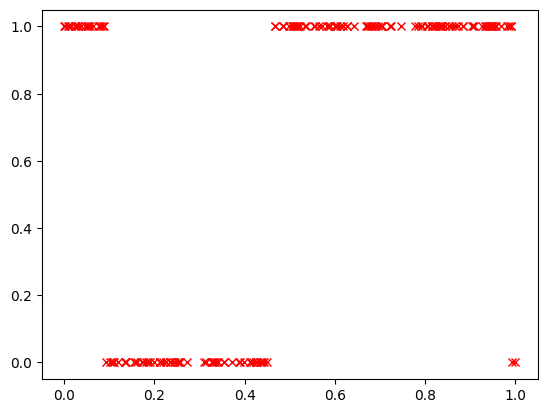

In [ ]:
Y, iAnn, Lam_r = MA_Clas_Gen(X ,t, R=5, NrP=1)

In [ ]:

Y = Y - 1
t = t - 1


annotator 1
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        59
           1       0.88      0.93      0.90        71
           2       0.95      0.83      0.89        48

    accuracy                           0.90       178
   macro avg       0.91      0.89      0.90       178
weighted avg       0.90      0.90      0.90       178

annotator 2
              precision    recall  f1-score   support

           0       0.46      0.20      0.28        59
           1       0.62      0.82      0.71        71
           2       0.54      0.67      0.60        48

    accuracy                           0.57       178
   macro avg       0.54      0.56      0.53       178
weighted avg       0.55      0.57      0.54       178

annotator 3
              precision    recall  f1-score   support

           0       0.65      0.97      0.78        59
           1       0.72      0.51      0.60        71
           2       0.55      0.46      

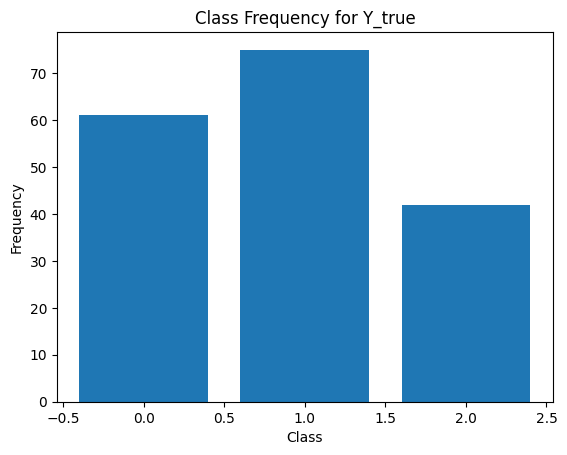

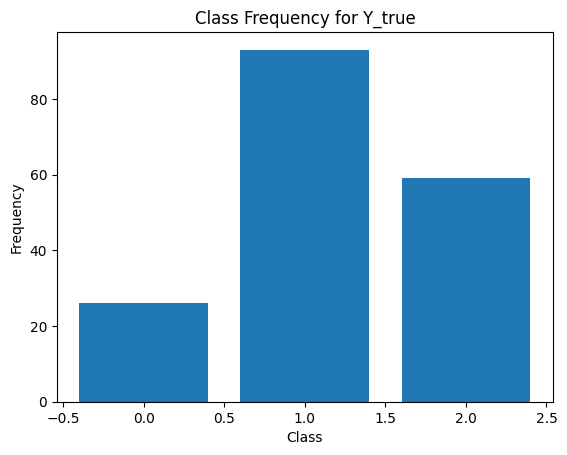

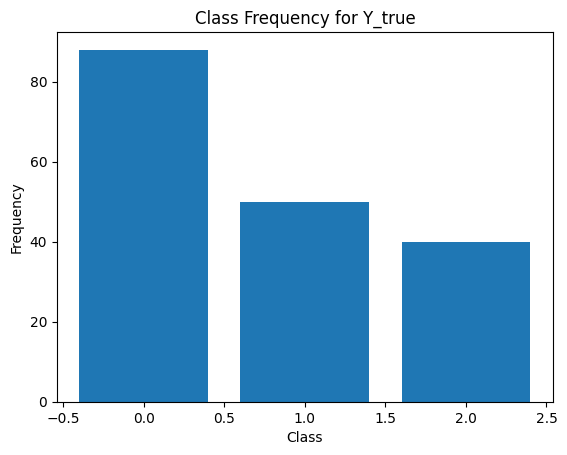

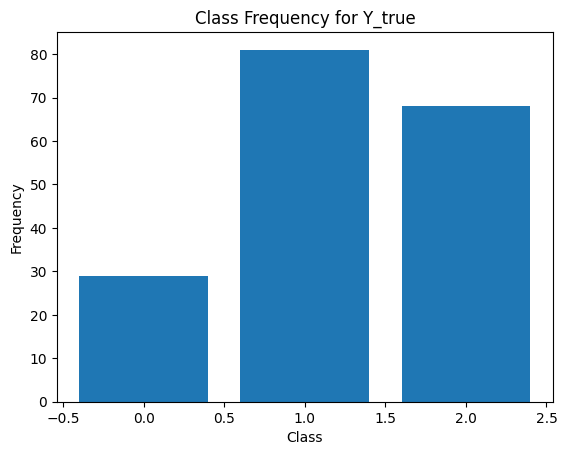

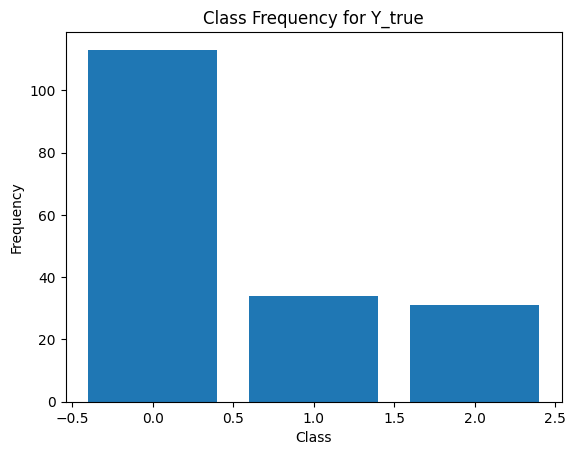

In [ ]:
from sklearn.metrics import classification_report
for i in range(Y.shape[1]):
    print('annotator',i+1)
    print(classification_report(t,Y[:,i]))
    unique, counts = np.unique(Y[:,i], return_counts=True)
    plt.figure()
    plt.bar(unique, counts)
#     unique, counts = np.unique(Y_test[5], return_counts=True)
#     plt.bar(unique, counts)

    plt.title('Class Frequency for Y_true')
    plt.xlabel('Class')
    plt.ylabel('Frequency')


# Split data

In [ ]:
import numpy.matlib
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
Ns = 1
ss = ShuffleSplit(n_splits=Ns, test_size=0.3,random_state =123)
for train_index, test_index in ss.split(X):
    print(test_index)
    X_train, X_test,Y_train,Y_test = X[train_index,:], X[test_index,:],Y[train_index,:], Y[test_index,:]
    Y_true_train, Y_true_test = t[train_index].reshape(-1,1), t[test_index].reshape(-1,1)
print(X_train.shape, Y_train.shape, Y_true_train.shape)

[138  60 137  77  90 159  41 136 166  93 154 141 164  33  31 152  82 122
  42  87 139 147 151 162  79 169 157  95  53  10  23  37 134 110 167 120
 142   8  72 114 148 163  36  20 121  28  13  88  24 100 127 143 144  85]
(124, 13) (124, 5) (124, 1)


# Apply MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Testing the Class


In [ ]:
from sklearn.metrics import classification_report, balanced_accuracy_score, roc_auc_score
from sklearn.metrics import normalized_mutual_info_score, mutual_info_score, adjusted_mutual_info_score
import pandas as pd
l1 =0.1
NUM_RUNS =10
custom_loss = "GCE"


results = []
for i in range(NUM_RUNS):

    print("iteration: " + str(i))

    # CKA(epochs=50,batch_size=100,length_scale=1e-2,iAnn=np.ones(2)):
    #     epochs = epochs
    #     batch_size = batch_size
    #     length_scale=length_scale
    #     iAnn = iAnn
    #     R = iAnn.shape[1] #annotators
    #     mu = tf.Variable(tf.random.uniform(shape=(1, R), dtype=tf.float64))
    #     ls = tf.Variable(length_scale, dtype=tf.float64)


    MA = CKA(iAnn= np.ones((Y_train.shape[0],5)) )

    # Keras_MA_RCDNN(epochs=100,batch_size=128,R=5, K=len(np.unique(Y_true_train)), dropout=0.25, learning_rate=0.001,optimizer='Adam',
    #             l1_param=l1,  validation_split=0, verbose=0, q=0.3 )

    #MA = Keras_MA_RCDNN(epochs=100,batch_size=128,R=5, K=len(np.unique(Y_true_train)), dropout=0.25, learning_rate=0.001,optimizer='Adam',
            #    l1_param=l1,  validation_split=0, verbose=0, q=0.3, neurons=4, loss = custom_loss )

    MA.fit(X_train, Y_train)
    MA.plot_history()

    # Generate the predictions for the current run
    pred_2 = MA.predict(X_test)

    acc, auc, auc_sk,  nmi,  bacc = evaluation_metrics(Y_true_test,  pred_2[:,Y.shape[1]:], print_result=False)  # mi, ami,

    # Save the results for the current run to the list of dictionaries
    results.append({
        #'run': i,
        'accuracy': acc,
        'balanced_accuracy': bacc,
       # 'mutual_information': mi,
        'normalized_mutual_information': nmi,
     #   'adjusted_mutual_information': ami,
        'auc_tensorflow': auc,
        'auc_scikit_learn': auc_sk,
    })

# Convert the list of dictionaries to a DataFrame
df = np.round(pd.DataFrame(results)*100, 2)

# Calculate the mean and standard deviation of each metric
mean = np.round(df.mean(),2)
std = np.round(df.std(),2)




iteration: 0
Start of epoch 0


TypeError: ignored

In [ ]:
np.ones((5,5)).shape[1]

5

In [ ]:
df

In [ ]:
mean

In [ ]:
std

In [ ]:
result_df = pd.concat([mean.rename('Mean'), std.rename('Std')], axis=1)

In [ ]:
result_df

In [ ]:
# Save the DataFrame to an excel file
result_df.to_excel(database + custom_loss + ".xlsx")